<a href="https://colab.research.google.com/github/syedsadabalam/codsoft/blob/main/MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOVIE RATING PREDICTION PROJECT - Task 2**

Name- SYED SADAB ALAM
---
Batch- A10 (15 Oct-15 Nov)


### ***Importing Libreries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **Read the data set**

In [ ]:
movie_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/IMDbMoviesIndia.csv', encoding='ISO-8859-1')
movie_data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### **Understanding the data set**

In [ ]:
movie_data.shape

(15509, 10)

In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

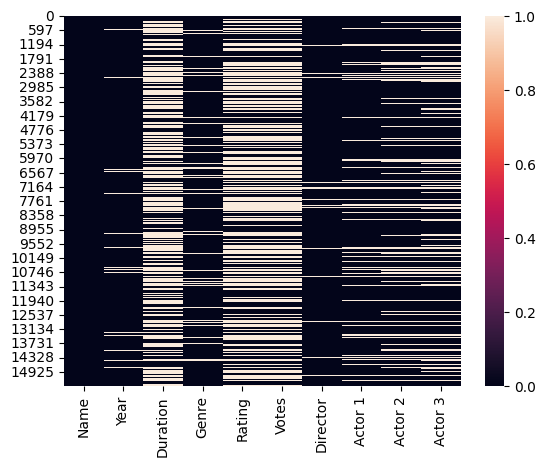

In [ ]:
sns.heatmap(movie_data.isnull())

### **Data Cleaning**

In [ ]:
#checking percentage of missing values of the data set
percentage_of_missing = movie_data.isnull().sum() * 100 / len(movie_data)
print (percentage_of_missing)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [ ]:
#remove rows which content null value
movie_data.dropna(axis=0, inplace=True)

In [ ]:
# again checking null values
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
#checking for duulicates value
dup_mv_data= movie_data.duplicated().any()
print("are there any duplicalte values?", dup_mv_data)

are there any duplicalte values? False


We get "FALSE", We dont have any dulplciate values

### **Analyzing the data set**

In [ ]:
#statics of movie dataset
movie_data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


### **In which year there was average voting ?**

In [ ]:

movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
# Clean the 'Votes' column by removing commas and converting it to float
movie_data['Votes'] = movie_data['Votes'].str.replace(',', '', regex=True).astype(float)

# Now, calculate the mean of 'Votes' by 'Year'
mean_votes_by_year = movie_data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

# Print the result
print(mean_votes_by_year)

Year
(2012)    9900.971429
(2007)    7212.017094
(2016)    6780.601156
(2009)    5938.805085
(2020)    5819.257143
             ...     
(1932)      12.000000
(1933)      12.000000
(1938)      10.600000
(1939)       9.500000
(1934)       8.500000
Name: Votes, Length: 91, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

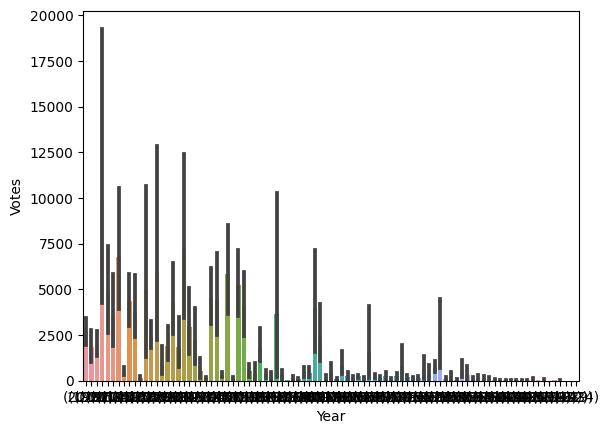

In [ ]:
sns.barplot(x='Year', y='Votes', data=movie_data)
plt.show

### **Finding Top 10 years of voting**

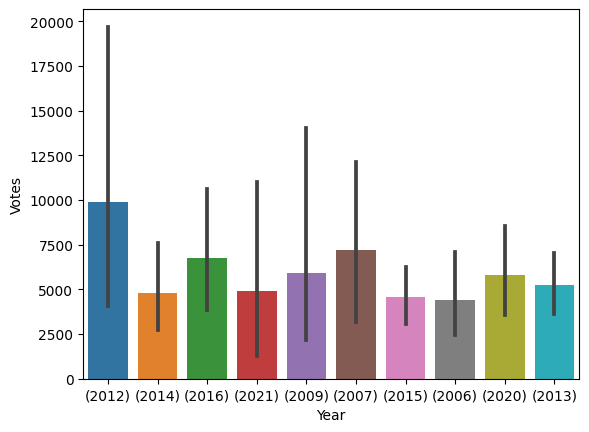

In [ ]:

top_10_years = mean_votes_by_year.sort_values(ascending=False).head(10)

# Filter the data to include only the top 10 years
filtered_data = movie_data[movie_data['Year'].isin(top_10_years.index)]

#the bar plot for the top 10 years
sns.barplot(x='Year', y='Votes', data=filtered_data)
plt.show()

### **Average Rating for Each Director**

In [ ]:
direct_data = movie_data.groupby('Director')['Rating'].mean().sort_values(ascending=False)
print(direct_data)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Munni Pankaj         9.4
Suhrud Godbole       9.4
Arvind Pratap        9.4
                    ... 
Navin Batra          1.9
Raajeev Walia        1.8
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 2431, dtype: float64


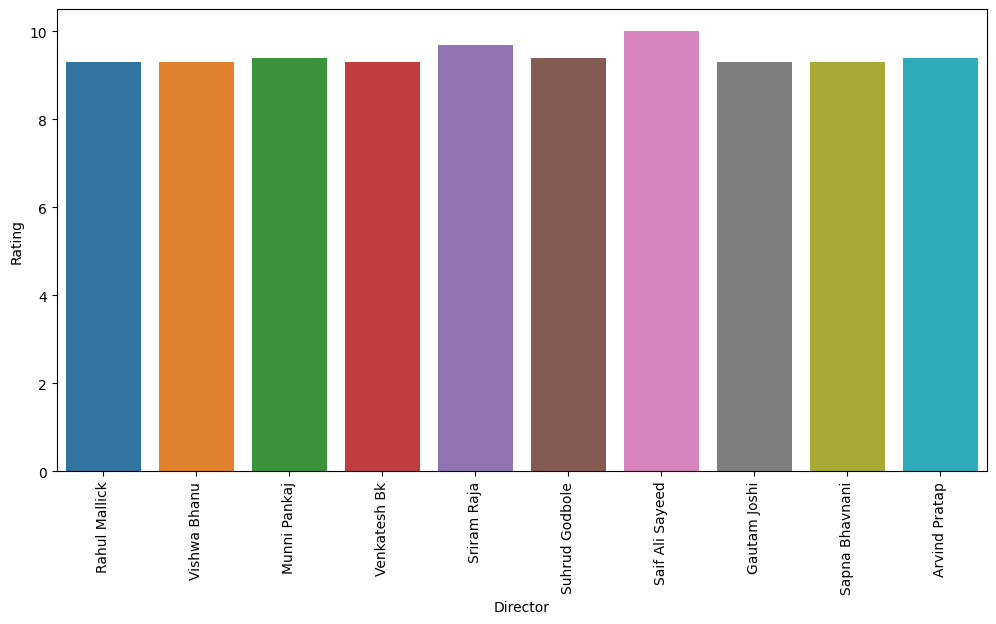

In [ ]:
# Calculate the mean rating for each director
mean_rating_by_director = movie_data.groupby('Director')['Rating'].mean()

# Sort the directors based on the mean ratings in descending order and select the top 10
top_10_directors = mean_rating_by_director.sort_values(ascending=False).head(10)

# Filter the data to include only the top 10 directors
filtered_data = movie_data[movie_data['Director'].isin(top_10_directors.index)]

# Create the bar plot for the top 10 directors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Director', y='Rating', data=filtered_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### **Number of movies per year**

<Axes: xlabel='Year', ylabel='count'>

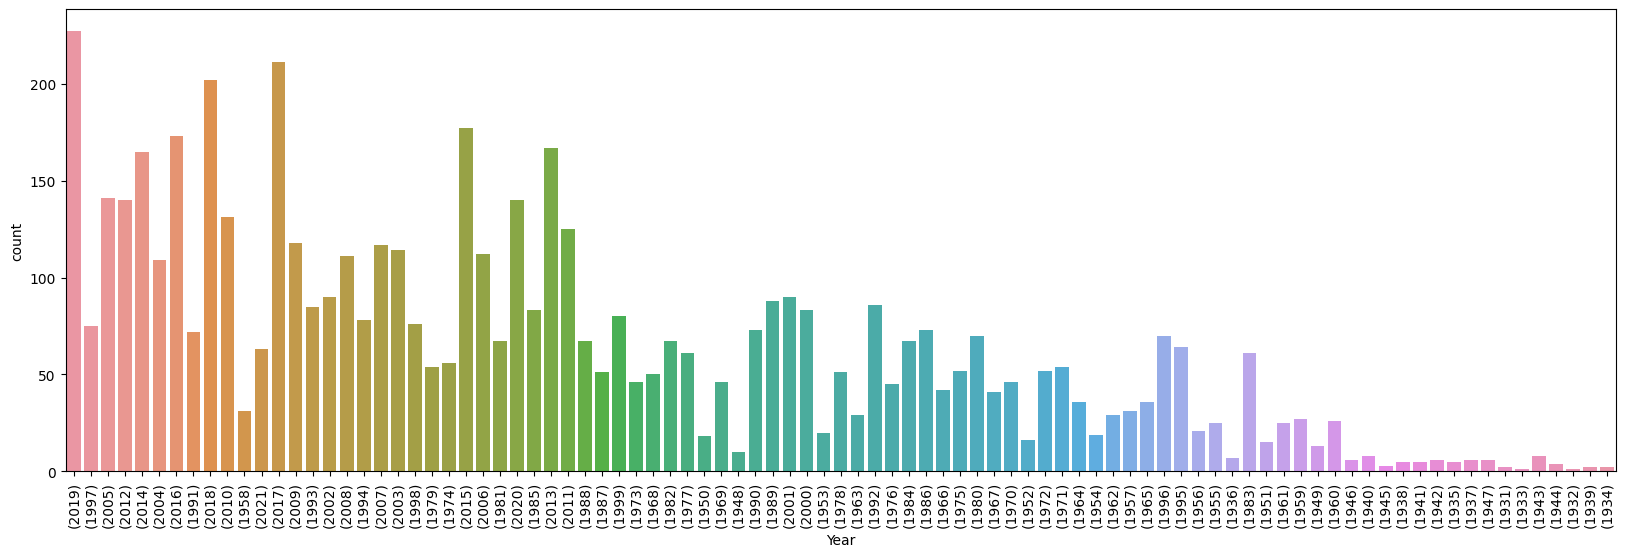

In [ ]:
 plt.figure(figsize=(20, 6))
 plt.xticks(rotation=90)
 sns.countplot(x='Year', data=movie_data)


### **Top 10 highest rated movie Name And it's Director**

In [ ]:
top10_len=movie_data.nlargest(10,'Rating')[['Name','Rating','Director']].set_index('Name')
print(top10_len)

                     Rating         Director
Name                                        
Love Qubool Hai        10.0  Saif Ali Sayeed
Half Songs              9.7      Sriram Raja
Gho Gho Rani            9.4     Munni Pankaj
June                    9.4   Suhrud Godbole
The Reluctant Crime     9.4    Arvind Pratap
Ashok Vatika            9.3    Rahul Mallick
Baikunth                9.3     Vishwa Bhanu
God of gods             9.3     Venkatesh Bk
Love Sorries            9.3     Gautam Joshi
Refl3ct                 9.3     Nikhil Mahar


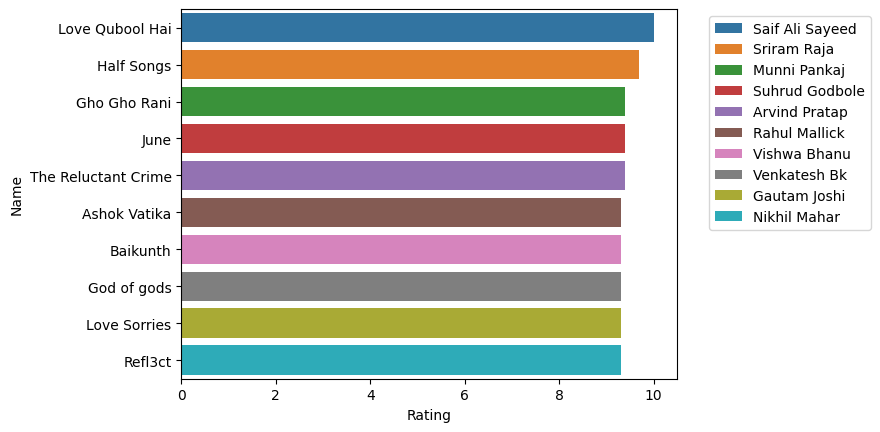

In [ ]:
sns.barplot(x='Rating', y=top10_len.index, data=top10_len, hue= 'Director',
              dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

### **Clssification of Movies based on Rating**

In [ ]:
#function to classify by rating
def rating (rating):
  if rating >=7.0:
    return "Excellent"
  elif rating >= 6.0:
    return "Good"
  else:
     return "Average"


In [ ]:
#new category column creating
movie_data['catogory'] = movie_data['Rating'].apply(rating)

#checking column
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,catogory
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,Excellent
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,0,0,0,0,0,Average
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,0,0,0,0,0,0,0,0,Average
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,0,0,0,0,0,0,Excellent
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,1,0,0,0,0,0,0,0,0,Average
